img_h, img_w, img_c = (256, 256, 3)


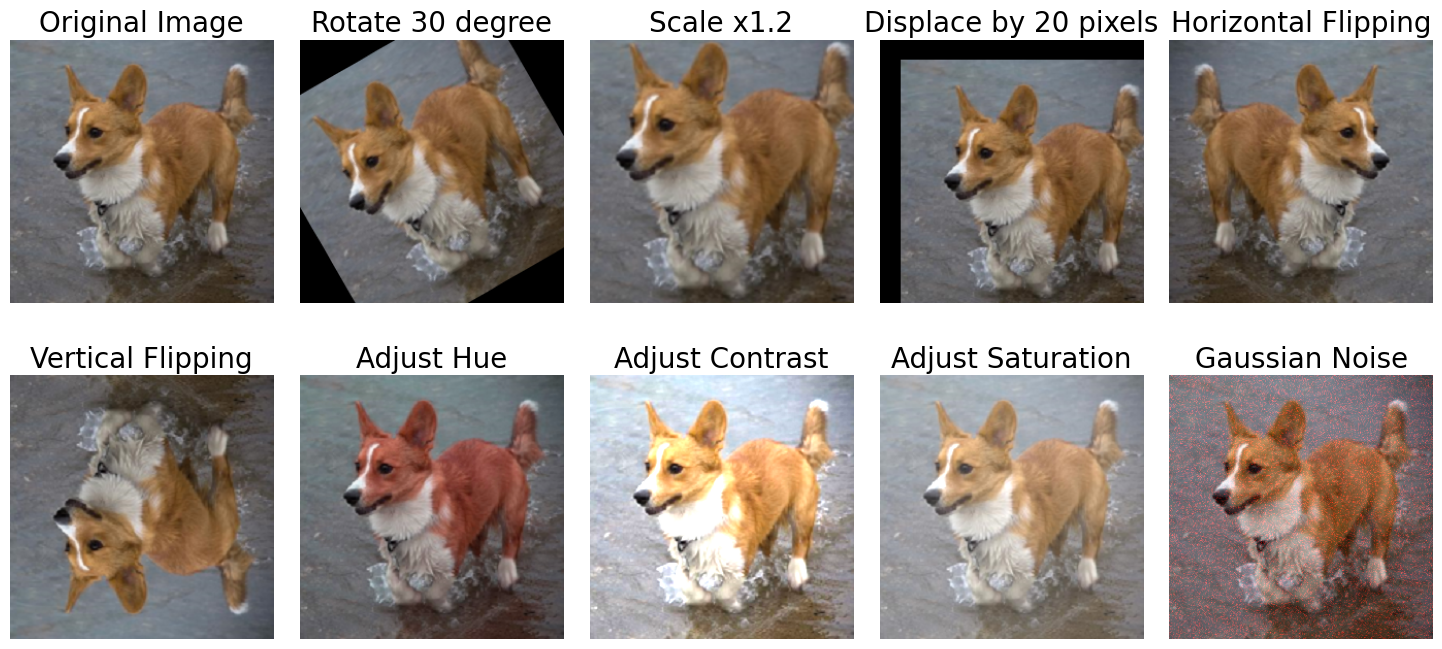

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image file
img = cv2.imread('dog.png')
# 
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img_h, img_w, img_c = img.shape
print(f"img_h, img_w, img_c = {(img_h, img_w, img_c)}")
img_list = [img]

title = ["Dog 1.0", "Dog 0.5", "Cat 0.5", "Dog 0.6",
         "Dog 0.4", "Vertical Flipping", "Adjust Hue", "Adjust Contrast", "Adjust Saturation", "Gaussian Noise"]

# Rotation
ROTATE_ANGLE = 30
center = tuple(np.array(img.shape[1::-1]) / 2)
M = cv2.getRotationMatrix2D(center, ROTATE_ANGLE, 1.0)
img_list.append(cv2.warpAffine(img, M, img.shape[1::-1], flags=cv2.INTER_LINEAR))

# Scaling 
SCALE_RATIO = 1.2
cy, cx = int(img_h/2), int(img_w/2)
rot_mat = cv2.getRotationMatrix2D((cx,cy), 0, 1.2)
img_list.append(cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR))

# Displace by 20
dx, dy = 20, 20
M = np.float32([[1, 0, dx], [0, 1, dy]])
img_list.append( cv2.warpAffine(img, M, (img.shape[1], img.shape[0])) )

# Horizontally Flip
img_list.append( cv2.flip(img, 1) )

# Vertically Flip
img_list.append( cv2.flip(img, 0) )

# Hue change
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
h = h + 10  # Increase the hue by 10 degrees
h = np.clip(h, 0, 179)
hsv_img = cv2.merge([h, s, v])
img_list.append( cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR) )

# Adjust the image's contrast and saturation using cv2.convertScaleAbs() function
# Alpha: Contrast control (1.0-3.0)
# Beta: Brightness control (0-100)

# Contrast
img_list.append( cv2.convertScaleAbs(img, alpha=1.8, beta=0) )

# Saturation
img_list.append( cv2.convertScaleAbs(img, alpha=1.0, beta=50) )

# Guassian Noise
mean   = 0
stddev = 50
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, mean, stddev)
img_list.append( cv2.add(img, noise) )

# Display the original and rotated images using Matplotlib
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
fig.set_facecolor('white')
fig.tight_layout()
for img_idx in range(len(img_list)):
    axs[int(img_idx/5), img_idx%5].axis('off')
    axs[int(img_idx/5), img_idx%5].imshow(img_list[img_idx] )
    axs[int(img_idx/5), img_idx%5].set_title( title[img_idx], fontsize = 20 )

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.1)

# Image Erasing Method

img_h, img_w, img_c = (256, 256, 3)


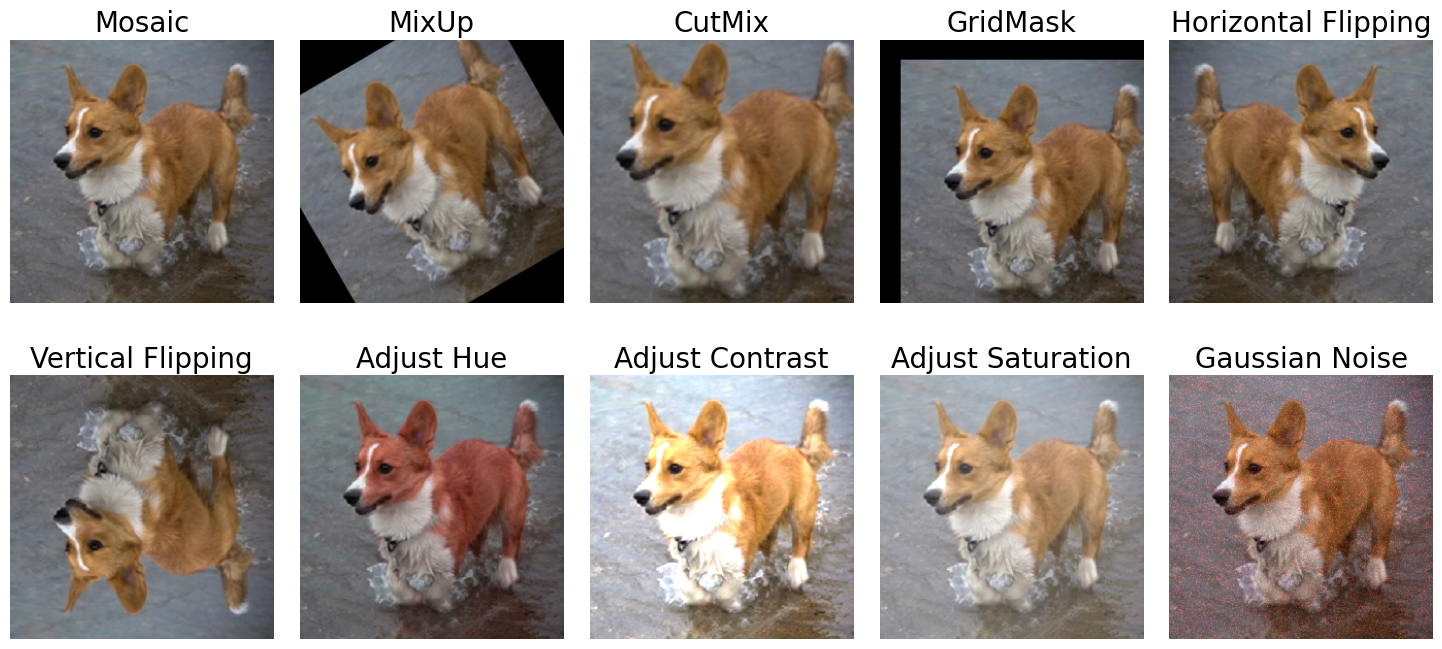

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image file
img = cv2.imread('dog.png')
# 
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img_h, img_w, img_c = img.shape
print(f"img_h, img_w, img_c = {(img_h, img_w, img_c)}")
img_list = [img]

# title = ["Original Image", "Rotate 30 degree", "Scale x1.2", "Displace by 20 pixels",
#          "Horizontal Flipping", "Vertical Flipping", "Adjust Hue", "Adjust Contrast", "Adjust Saturation", "Gaussian Noise"]

title = ["Mosaic", "MixUp", "CutMix", "GridMask",
         "Horizontal Flipping", "Vertical Flipping", "Adjust Hue", "Adjust Contrast", "Adjust Saturation", "Gaussian Noise"]


# Rotation
ROTATE_ANGLE = 30
center = tuple(np.array(img.shape[1::-1]) / 2)
M = cv2.getRotationMatrix2D(center, ROTATE_ANGLE, 1.0)
img_list.append(cv2.warpAffine(img, M, img.shape[1::-1], flags=cv2.INTER_LINEAR))

# Scaling 
SCALE_RATIO = 1.2
cy, cx = int(img_h/2), int(img_w/2)
rot_mat = cv2.getRotationMatrix2D((cx,cy), 0, 1.2)
img_list.append(cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR))

# Displace by 20
dx, dy = 20, 20
M = np.float32([[1, 0, dx], [0, 1, dy]])
img_list.append( cv2.warpAffine(img, M, (img.shape[1], img.shape[0])) )

# Horizontally Flip
img_list.append( cv2.flip(img, 1) )

# Vertically Flip
img_list.append( cv2.flip(img, 0) )

# Hue change
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
h = h + 10  # Increase the hue by 10 degrees
h = np.clip(h, 0, 179)
hsv_img = cv2.merge([h, s, v])
img_list.append( cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR) )

# Adjust the image's contrast and saturation using cv2.convertScaleAbs() function
# Alpha: Contrast control (1.0-3.0)
# Beta: Brightness control (0-100)

# Contrast
img_list.append( cv2.convertScaleAbs(img, alpha=1.8, beta=0) )

# Saturation
img_list.append( cv2.convertScaleAbs(img, alpha=1.0, beta=50) )

# Guassian Noise
mean   = 0
stddev = 50
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, mean, stddev)
img_list.append( cv2.add(img, noise) )

# Display the original and rotated images using Matplotlib
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
fig.set_facecolor('white')
fig.tight_layout()
for img_idx in range(len(img_list)):
    axs[int(img_idx/5), img_idx%5].axis('off')
    axs[int(img_idx/5), img_idx%5].imshow(img_list[img_idx] )
    axs[int(img_idx/5), img_idx%5].set_title( title[img_idx], fontsize = 20 )

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.1)